In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('WalmartSalesData-2024.csv')

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2024,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2024,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2024,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2024,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2024,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,29-01-2024,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,02-03-2024,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,09-02-2024,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,22-02-2024,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2024
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2024
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2024
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2024
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2024


In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"unique value in {column}: {unique_values}\n")
 

unique value in Invoice ID: ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '232-1

In [8]:
df['Month'] = df['Date'].dt.month.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [9]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,January,2024
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,March,2024
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,March,2024
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,January,2024
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,February,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2024-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,29,January,2024
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2024-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,2,March,2024
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2024-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,9,February,2024
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2024-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,22,February,2024


# Generic Question

In [10]:
# 1. How many unique cities does the data have?

unique_cities = df['City'].unique()
print(unique_cities)   

['Yangon' 'Naypyitaw' 'Mandalay']


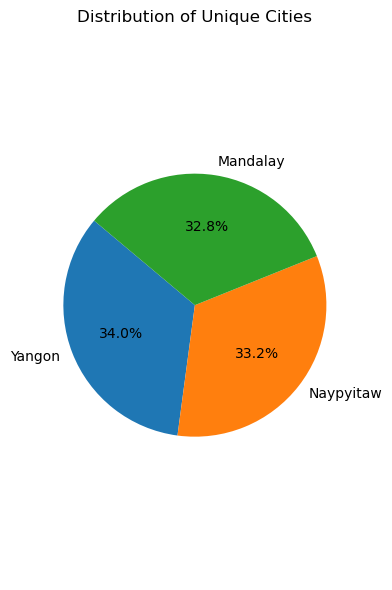

In [11]:
# Plotting
plt.figure(figsize=(4, 6))
plt.pie(df['City'].value_counts(), labels=unique_cities, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Cities')
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [12]:
# 2. In which city has  branch A B C together?

filtered_data = df[df['Branch'].isin(['A', 'B', 'C'])]

cities_with_all_branches = filtered_data['City'].unique()

print("Cities where branches A, B, and C are located together:")
for city in cities_with_all_branches:
    print(city)

Cities where branches A, B, and C are located together:
Yangon
Naypyitaw
Mandalay


# Product

In [13]:
# 1. How many unique product lines does the data have?
unique_products = df['Product line'].unique()
print(unique_products)   

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [14]:
# 2. What is the most common payment method?
payment_counts = df['Payment'].value_counts()
most_common_payment_method = payment_counts.idxmax()
print("The most common payment method is:", most_common_payment_method)

The most common payment method is: Ewallet


In [15]:
# 3. What is the most selling product line?
product_line_counts = df['Product line'].value_counts()
most_selling_product_line = product_line_counts.idxmax()
print("The most selling product line is:", most_selling_product_line)

The most selling product line is: Fashion accessories


In [16]:
# 4. What is the total revenue by month?
revenue_by_month = df.groupby('Month')['Total'].sum()

print(revenue_by_month)

Month
February     97219.374
January     116291.868
March       109455.507
Name: Total, dtype: float64


In [17]:
# 5. What is the city with the largest revenue?

revenue_by_city = df.groupby('City')['Total'].sum()
city_with_largest_revenue = revenue_by_city.idxmax()

largest_revenue = revenue_by_city.max()
print("City with the largest revenue:", city_with_largest_revenue)
print("Revenue:", largest_revenue)

City with the largest revenue: Naypyitaw
Revenue: 110568.7065


In [18]:
# 6. What product line had the largest VAT?

df['VAT'] = df['Unit price'] * df['Quantity'] * 0.05

VAT_by_product_line = df.groupby('Product line')['VAT'].sum()
product_line_with_largest_VAT = VAT_by_product_line.idxmax()

largest_VAT = VAT_by_product_line.max()

print("Product line with the largest VAT:", product_line_with_largest_VAT)
print("Largest VAT amount:", largest_VAT)

Product line with the largest VAT: Food and beverages
Largest VAT amount: 2673.5640000000003


In [19]:
# 7. Fetch each product line and add a column to those product line showing "Good", "Bad". Good if its greater than average sales

unique_products = df['Product line'].unique()
average_sales_by_product_line = df.groupby('Product line')['Total'].mean()

def categorize_sales(total_sales, product_line):
    average_sales = average_sales_by_product_line[product_line]
    return 'Good' if total_sales > average_sales else 'Bad'

df = df[df['Product line'].isin(unique_products)].copy()

df['Sales Category'] =unique_df.apply(lambda row: categorize_sales(row['Total'], row['Product line']), axis=1)
sales_category_counts =df.groupby(['Product line', 'Sales Category']).size().unstack(fill_value=0)
print(df[['Product line', 'Total', 'Sales Category']])
print(sales_category_counts)

NameError: name 'unique_df' is not defined

In [ ]:
# Plotting
sales_category_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Product line')
plt.ylabel('Count')
plt.title('Sales Category Distribution by Product Line')
plt.xticks(rotation=90)
plt.legend(title='Sales Category')
plt.tight_layout()
plt.show()

In [ ]:
# 8. Which branch sold more products than average product sold?

average_products_sold = df['Quantity'].mean()

total_products_sold_by_branch = df.groupby('Branch')['Quantity'].sum()

branches_above_average = total_products_sold_by_branch[total_products_sold_by_branch > average_products_sold].index.tolist()

print("Branches that sold more products than the average number of products sold:")
print(branches_above_average)

In [ ]:
# 9. What is the most common product line by gender?

product_line_counts_by_gender = df.groupby(['Gender', 'Product line']).size()

most_common_product_line_by_gender = product_line_counts_by_gender.groupby('Gender').idxmax()

print("Most common product line by gender:")
print(most_common_product_line_by_gender)

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
for gender in df['Gender'].unique():
    plt.bar(df['Product line'].unique(),
            product_line_counts_by_gender[gender],
            label=gender)
plt.xlabel('Product line')
plt.ylabel('Frequency')
plt.title('Frequency of Product Lines by Gender')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 12. What is the average rating of each product line?
average_rating_by_product_line = df.groupby('Product line')['Rating'].mean()

print("Average rating of each product line:")
print(average_rating_by_product_line)

# Sales

In [ ]:
# 1. Number of sales made in each time of the day per weekday

df['Time'] = pd.to_datetime(df['Time'])

df['Hour'] = df['Time'].dt.hour

sales_per_time = df.groupby([df['Time'].dt.day_name(), 'Hour'])['Quantity'].count()

sales_per_time.index.names = ['Weekday', 'Hour']

print(sales_per_time)

In [ ]:
# 2. Which of the customer types brings the most revenue?
revenue_per_customer_type = df.groupby('Customer type')['Total'].sum()

most_revenue_customer_type = revenue_per_customer_type.idxmax()

print("Customer type with the most revenue:", most_revenue_customer_type)

In [ ]:
# 3. Which city has the largest tax percent/ VAT (**Value Added Tax**)?

df['Tax Percentage'] = (df['Tax 5%'] / df['Total']) * 100

avg_tax_percentage_per_city = df.groupby('City')['Tax Percentage'].mean()

city_with_largest_tax_percent = avg_tax_percentage_per_city.idxmax()

print("City with the largest tax percent (VAT):", city_with_largest_tax_percent)

In [ ]:
# 4. Which customer type pays the most in VAT?

df['VAT'] = df['Tax 5%']

total_vat_per_customer_type = df.groupby('Customer type')['VAT'].sum()

customer_type_with_most_vat = total_vat_per_customer_type.idxmax()

print("Customer type that pays the most in VAT:", customer_type_with_most_vat)

In [ ]:
plt.figure(figsize=(6, 4))
total_vat_per_customer_type.plot(kind='bar', color='skyblue')
plt.xlabel('Customer Type')
plt.ylabel('Total VAT')
plt.title('Total VAT Paid by Customer Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Customer

In [ ]:
# 1. How many unique customer types does the data have?

unique_customer_types = df['Customer type'].unique()
print("Unique customer types:")
for customer_type in unique_customer_types:
    print(customer_type)

In [ ]:
# 2. How many unique payment methods does the data have?

unique_payment_methods = df['Payment'].unique()

num_unique_payment_methods = len(unique_payment_methods)

print("Number of unique payment methods:", num_unique_payment_methods)
print("Unique payment methods:")
for payment_method in unique_payment_methods:
    print(payment_method)

In [ ]:
# 3. What is the most common customer type?

most_common_customer_type = df['Customer type'].value_counts().idxmax()

print("Most common customer type:", most_common_customer_type)

In [ ]:
# 4. Which customer type buys the most?
total_quantity_per_customer_type = df.groupby('Customer type')['Quantity'].sum()

customer_type_with_most_purchase = total_quantity_per_customer_type.idxmax()

print("Customer type that buys the most:", customer_type_with_most_purchase)

In [ ]:
# 5. What is the gender of most of the customers?
most_common_gender = df['Gender'].value_counts().idxmax()

print("Gender of most customers:", most_common_gender)


In [ ]:
# 6. What is the gender distribution per branch?
gender_distribution_per_branch = df.groupby(['City', 'Gender']).size().unstack(fill_value=0)

print("Gender distribution per branch:")
print(gender_distribution_per_branch)

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
gender_distribution_per_branch.plot(kind='bar', stacked=True)
plt.xlabel('Branch')
plt.ylabel('Count')
plt.title('Gender Distribution per Branch')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
# 7. Which time of the day do customers give most ratings?

df['Time'] = pd.to_datetime(df['Time'])

df['Hour'] = df['Time'].dt.hour

avg_rating_per_hour = df.groupby('Hour')['Rating'].mean()

hour_with_most_ratings = avg_rating_per_hour.idxmax()

print("Time of day with the most ratings (based on average rating):", hour_with_most_ratings)

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_per_hour.index, avg_rating_per_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rating')
plt.title('Average Rating by Hour of the Day')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 8. Which time of the day do customers give most ratings per branch?

df['Time'] = pd.to_datetime(df['Time'])

df['Hour'] = df['Time'].dt.hour

avg_rating_per_branch_hour = df.groupby(['City', 'Hour'])['Rating'].mean()

hour_with_most_ratings_per_branch = avg_rating_per_branch_hour.groupby(level=0).idxmax()

print("Time of day with the most ratings per branch:")
print(hour_with_most_ratings_per_branch)

In [ ]:
# 9. Which day has the best avg ratings?

df['Date'] = pd.to_datetime(df['Date'])

df['Day of Week'] = df['Date'].dt.day_name()

avg_rating_per_day = df.groupby('Day of Week')['Rating'].mean()

best_day_for_ratings = avg_rating_per_day.idxmax()

print("Day of the week with the best average ratings:", best_day_for_ratings)

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
avg_rating_per_day.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')
plt.title('Average Rating by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 10. Which day of the week has the best average ratings per branch?

df['Date'] = pd.to_datetime(df['Date'])

df['Day of Week'] = df['Date'].dt.day_name()

avg_rating_per_branch_day = df.groupby(['City', 'Day of Week'])['Rating'].mean()

best_day_for_ratings_per_branch = avg_rating_per_branch_day.groupby(level=0).idxmax()

print("Day of the week with the best average ratings per branch:")
print(best_day_for_ratings_per_branch)